# Transformación y cálculo de indicadores SEPIID

Análisis de datos exploratorio del Censo aplicado por el CJF, Flacso y UNPFA que corresponden al 2024
## Objectivos

* Transformar las variables claves
* Estadísticas descriptivas
* Aglomerar las columnas que se requieren para el cálculo de los siguientes indicadores:
1. Porcentaje de mujeres y de hombres que tienen acceso a prestaciones laborales e institucionales relacionadas con la conciliación corresponsable (acceso a trámites).
2. Razón en el uso del tiempo en el trabajo doméstico y de cuidados no remunerado
3. Porcentaje de mujeres y de hombres con alguna adscripción o pertenencia étnica
Consultar el diccionario de datos de la base de datos en: https://docs.google.com/spreadsheets/d/17GZsKvYDVkK2Wo5ydhHyoCs4bDcrg-VInfmoyuxEaPI/edit?gid=404889619#gid=404889619



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Para cargar un archivo CSV, deberá cambiar la dirección.
censo = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/CensoFlacso2024Limpio_v2.csv')

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/1646486834.py:2: DtypeWarning: Columns (55,56,58,59,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  censo = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/CensoFlacso2024Limpio_v2.csv')


In [5]:
#Muestra las primeras 5 observaciones de todas la columnas
censo.head(5)

,Unnamed: 0,Folio,Fecha_Inicio,Puesto,IdÁrea,Área,Antiguedad,Edad,P6,P8,...,P103,P104,P108,P109,P110,P111,P113,P114,IdUnico,Expediente
0,0,7962-8731050410,13/02/2024 10:46:00 A. M.,MAGISTRADA/ MAGISTRADO DE CIRCUITO,90133,DECIMOTERCER TRIBUNAL COLEGIADO EN MATERIA DE ...,49,74,2.0,2.0,...,3.0,NaN,2,NaN,NaN,NaN,NaN,NaN,1050410,84
1,1,7962-4251050411,13/02/2024 12:04:00 P. M.,SECRETARIA A/ SECRETARIO A,90230,COORDINACIÓN DE ADMINISTRACIÓN REGIONAL.,28,69,2.0,2.0,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1050411,86
2,2,7962-6061050414,16/02/2024 12:05:00 P. M.,MAGISTRADA/ MAGISTRADO DE CIRCUITO,17085,TERCER TRIBUNAL COLEGIADO EN MATERIAS PENAL Y ...,36,71,2.0,2.0,...,2.0,NaN,2,NaN,NaN,NaN,NaN,NaN,1050414,275
3,3,7962-0151050417,15/02/2024 12:37:00 P. M.,TÉCNICA ESPECIALIZADA/ TÉCNICO ESPECIALIZADO,90015,DIRECCIÓN GENERAL DE RECURSOS HUMANOS,25,68,2.0,2.0,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1050417,359
4,4,7962-4721050418,16/02/2024 03:49:00 P. M.,JEFA/ JEFE DE DEPARTAMENTO,90373,CONTRALORIA DEL CONSEJO DE LA JUDICATURA FEDERAL,20,72,2.0,2.0,...,3.0,NaN,2,NaN,NaN,NaN,NaN,NaN,1050418,408


In [7]:
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24271 entries, 0 to 24270
Columns: 122 entries, Unnamed: 0 to Expediente
dtypes: float64(68), int64(7), object(47)
memory usage: 22.6+ MB


In [9]:
indicadores= [
'IdUnico',
'Folio',
'Fecha_Inicio',
'Puesto',
'IdÁrea',
'Edad',
'P6', # pertenencia a un grupo indígene
'P8', # habla lengua indígena
'P9', # lee y escribe ind.
'P10', # considera afro
'P13', # Estado civil
'P14', # sexo
'P16', # identidad sexual
'P17',# id. género
'P24', # denuncia x Identidad y Expresión de Género
'P25',
'P35', # denuncia x discapacidad
'P36',
'P58', # horas de trabajo remunerado
'P59', # # horas de trabajo homeoffice   
'P61', ## trabajo no remunerado limpieza
'P62', # alimentos
'P64', # lavaddo
'P65', # compras
'P66', # acarrear agua
'P67', #calentar alimentos
'P68', #acompañamiento de tareas escolares
'P69', #adm. medicamentos
'P70', #aseo y cuidado de otros
'P71', #aseo y cuidado de otros
'P85', # DENUNCIA X ETNIA
'P86',
'P92', #HIJOS DURANTE CJF
'P93', #LICENCIA DE MATERNIDADD
'P96', # PERMISO DE LACTANCIA
'P103', #LICENCIA DE PATERNIDAD
'P108', #HIJAS MENORES DE 5
'P110', #SISTEMAS DE CUIDADOS 
'P111', # ESTÍMULO ECONÓMICO
'P114', # SGMM
]

In [11]:
df = censo[indicadores]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24271 entries, 0 to 24270
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdUnico       24271 non-null  int64  
 1   Folio         24271 non-null  object 
 2   Fecha_Inicio  24271 non-null  object 
 3   Puesto        24271 non-null  object 
 4   IdÁrea        24271 non-null  int64  
 5   Edad          24271 non-null  int64  
 6   P6            24264 non-null  float64
 7   P8            24251 non-null  float64
 8   P9            24251 non-null  float64
 9   P10           24251 non-null  float64
 10  P13           24251 non-null  float64
 11  P14           24266 non-null  float64
 12  P16           24266 non-null  float64
 13  P17           24265 non-null  float64
 14  P24           24231 non-null  float64
 15  P25           183 non-null    float64
 16  P35           11843 non-null  float64
 17  P36           54 non-null     float64
 18  P58           23275 non-nu

In [15]:
print(df.isnull().sum())

IdUnico             0
Folio               0
Fecha_Inicio        0
Puesto              0
IdÁrea              0
Edad                0
P6                  7
P8                 20
P9                 20
P10                20
P13                20
P14                 5
P16                 5
P17                 6
P24                40
P25             24088
P35             12428
P36             24217
P58               996
P59             10268
P61              3301
P62              3802
P64              4145
P65              3009
P66             17756
P67              3275
P68             13327
P69             13179
P70             18125
P71             13236
P85             22124
P86             24267
P92             12101
P93             19891
P96             20149
P103            12292
P108                0
P110            20506
P111            22780
P114            20527
dtype: int64


In [17]:
df.head()

,IdUnico,Folio,Fecha_Inicio,Puesto,IdÁrea,Edad,P6,P8,P9,P10,...,P85,P86,P92,P93,P96,P103,P108,P110,P111,P114
0,1050410,7962-8731050410,13/02/2024 10:46:00 A. M.,MAGISTRADA/ MAGISTRADO DE CIRCUITO,90133,74,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2,NaN,NaN,NaN
1,1050411,7962-4251050411,13/02/2024 12:04:00 P. M.,SECRETARIA A/ SECRETARIO A,90230,69,2.0,2.0,2.0,2.0,...,NaN,NaN,1.0,1.0,2.0,NaN,2,NaN,NaN,NaN
2,1050414,7962-6061050414,16/02/2024 12:05:00 P. M.,MAGISTRADA/ MAGISTRADO DE CIRCUITO,17085,71,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2,NaN,NaN,NaN
3,1050417,7962-0151050417,15/02/2024 12:37:00 P. M.,TÉCNICA ESPECIALIZADA/ TÉCNICO ESPECIALIZADO,90015,68,2.0,2.0,2.0,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN
4,1050418,7962-4721050418,16/02/2024 03:49:00 P. M.,JEFA/ JEFE DE DEPARTAMENTO,90373,72,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2,NaN,NaN,NaN


In [19]:
# convertir 0, 1 a etiquetas 'No' y 'Sí'
#Pertenecer a un grupo indígena
df['GRUP_IND'] = df['P6'].map({1: 'SI', 2: 'NO'}).astype('category')
#habla una lengua indígena
df['LEN_IND'] = df['P8'].map({1: 'SI', 2: 'NO'}).astype('category')
#lee o escribe una lengua indígena
df['ESC_IND'] = df['P9'].map({1: 'SI', 2: 'NO'}).astype('category')
#afro
df['AFRODES'] = df['P10'].map({1: 'SI', 2: 'NO'}).astype('category')
#Sexo
df['SEXO'] = df['P14'].map({1: 'Mujer', 2: 'Hombre'}).astype('category')
#Identidad de sexual
df['ID_SEX'] = df['P16'].map({1: 'Mujer lesbiana', 2: 'Hombre gay u homosexual', 3:'Persona heterosexual' , 4:'Persona bisexual' , 5:'Persona asexual' , 6:'Persona demisexual' , 7:'Persona pansexual' }).astype('category') 
#Identidad de género
df['GENERO'] = df['P17'].map({1: 'Hombre', 2: 'Mujer', 3:'No binario' , 4:'Agénero' , 5:'Intersexual' , 6:'Trans' }).astype('category') 
#Denuncias
df['DENUN_GENERO'] = df['P24'].map({1: 'SI', 2: 'NO'}).astype('category')
df['DENUN_DISCA'] = df['P35'].map({1: 'SI', 2: 'NO'}).astype('category')
df['DENUN_RACIALIZADA'] = df['P85'].map({1: 'SI', 2: 'NO'}).astype('category')
#INSTANCIAS DE RECEPCIÓN DE DENUNCIAS
df['INST_GENERO'] = df['P25'].map({1: 'Titular de órgano jurisdiccional o unidad administrativa', 2: 'Unidad de Prevención y Combate a la Violencia Laboral y Acoso Sexual', 3:'Contraloría del CJF' , 4:'Dirección General de Derechos Humanos, Igualdad de Género y Asuntos Internacionales' , 5:'Secretaría Ejecutiva de Disciplina' , 6:'Visitaduría General' , 7:'Buzón Electrónico de Quejas' }).astype('category') 
df['INST_DISC'] = df['P36'].map({1: 'Titular de órgano jurisdiccional o unidad administrativa', 2: 'Unidad de Prevención y Combate a la Violencia Laboral y Acoso Sexual', 3:'Contraloría del CJF' , 4:'Dirección General de Derechos Humanos, Igualdad de Género y Asuntos Internacionales' , 5:'Secretaría Ejecutiva de Disciplina' , 6:'Visitaduría General' , 7:'Buzón Electrónico de Quejas' }).astype('category') 
df['INST_RACIAL'] = df['P86'].map({1: 'Titular de órgano jurisdiccional o unidad administrativa', 2: 'Unidad de Prevención y Combate a la Violencia Laboral y Acoso Sexual', 3:'Contraloría del CJF' , 4:'Dirección General de Derechos Humanos, Igualdad de Género y Asuntos Internacionales' , 5:'Secretaría Ejecutiva de Disciplina' , 6:'Visitaduría General' , 7:'Buzón Electrónico de Quejas' }).astype('category') 
# LICENCIA DE MATERNIDAD
df['MADRE'] = df['P92'].map({1: 'SI', 2: 'NO', 3: 'NA' }).astype('category')
df['LIC_MATERNIDAD'] = df['P93'].map({1: 'SI', 2: 'NO' }).astype('category')
df['LACTANCIA'] = df['P96'].map({1: 'SI', 2: 'NO' }).astype('category')
# LICENCIA DE PATERNIDAD
df['PADRE'] = df['P103'].map({1: 'SI', 2: 'NO', 3: 'NA' }).astype('category')
# HIJOS
df['HIJXS_5'] = df['P108'].map({1: 'SI', 2: 'NO' }).astype('category')
# SISTEMA DE CUIDADOS
df['ESTANCIAS'] = df['P110'].map({1: 'CENDIS y Estancias Infantiles del Poder Judicial de la Federación', 2: 'Estancias de Bienestar y Desarrollo Infantil del ISSSTE', 3:'Guarderías IMSS Pasar a la pregunta' , 4:'Estancias infantiles particulares' , 5:'Ninguno de los anteriores' }).astype('category') 
df['ESTIMULO'] = df['P111'].map({1: 'SI', 2: 'NO' }).astype('category')
df['SGMM'] = df['P114'].map({1: 'SI', 2: 'NO' }).astype('category')


/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/635113356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GRUP_IND'] = df['P6'].map({1: 'SI', 2: 'NO'}).astype('category')
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/635113356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LEN_IND'] = df['P8'].map({1: 'SI', 2: 'NO'}).astype('category')
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/635113356.py:7: SettingWithCopyWarning: 
A value is tryi

In [21]:
# Definir los intervalos y etiquetas
bins = [20, 30, 40, 50, 100]
labels = ['21-30', '31-40', '41-50', '51+']
# Crear variable categórica
df['GRUP_EDAD'] = pd.cut(df['Edad'], bins=bins, labels=labels)

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/4083555054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GRUP_EDAD'] = pd.cut(df['Edad'], bins=bins, labels=labels)


In [23]:
#limpiar las columnas de tiempo no remunerado
def tiempo(valor):
    if pd.isnull(valor):
        return np.nan

    valor = str(valor).strip().upper()

    # Casos obvios de error
    if not re.search(r'\d', valor) or any(palabra in valor for palabra in ['NO', 'XXXX', '?', 'S/INTE']):
        return np.nan

    # Reemplazos comunes
    valor = valor.replace(',', '.')
    valor = re.sub(r'[A-Z]+', '', valor)  # Elimina letras como "HORA", "HRS"
    valor = re.sub(r'[^\d\.\:]', '', valor)  # Elimina caracteres extraños excepto números, puntos y :
    # Casos con múltiples puntos consecutivos o dispersos (e.g. "1..5", ".2.25", "2.50.")
    # Dejar solo el primer punto decimal válido
    if valor.count('.') > 1:
        partes = re.findall(r'\d+', valor)
        if len(partes) >= 2:
            valor = partes[0] + '.' + ''.join(partes[1:])
        else:
            return np.nan
    # Si es formato hora:minuto (e.g. "3:30")
    if ':' in valor:
        try:
            partes = valor.split(':')
            horas = int(partes[0])
            minutos = int(partes[1]) if len(partes) > 1 else 0
            return round(horas + minutos / 60, 2)
        except:
            return np.nan

    # Si es decimal normal (e.g. "1.5")
    try:
        num = float(valor)
        # Filtrar extremos sin sentido (ej. 1000 horas)
        if num < 0 or num > 99:  # más de una semana completa de horas con base en la ENUT
            return np.nan
        return round(num, 2)
    except:
        return np.nan

In [25]:
limpieza = [
'P61', ## trabajo no remunerado limpieza
'P62', # alimentos
'P64', # lavaddo
'P65', # compras
'P66', # acarrear agua
'P67', #calentar alimentos
'P68', #acompañamiento de tareas escolares
'P69', #adm. medicamentos
'P70', #aseo y cuidado de otros
'P71'] 

for col in limpieza:
    df[col] = df[col].apply(tiempo)

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/3836661737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(tiempo)


## Tiempo según la ENUT

-Labores de limpieza: 80 horas.
- Preparación de alimentos: 92 horas
- Lavado, secado, planchado y acomodo de ropa: 96 horas.
- Compras o pagos de servicios: 99 horas.
- A la producción de bienes: sembrar frutas, verduras, acarrear agua, recolectar
plantas, elaborar ropa, hacer conservas, elaborar muebles o remodelaciones a su
casa: 96 horas.
- Lavar y acomodar trastes, recoger la mesa, calentar alimentos, llevar alimentos a
alguien más: 96 horas.
- Acompañamiento de tareas escolares: 96 horas.
- Monitoreo y administración de medicamentos: 60 horas.
- Cuidado de personas mayores, con discapacidad, con algún padecimiento, etc.: 90
horas.
- Cuidado de menores y adultos como aseo personal, alimentación, etc: 90 horas.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24271 entries, 0 to 24270
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   IdUnico            24271 non-null  int64   
 1   Folio              24271 non-null  object  
 2   Fecha_Inicio       24271 non-null  object  
 3   Puesto             24271 non-null  object  
 4   IdÁrea             24271 non-null  int64   
 5   Edad               24271 non-null  int64   
 6   P6                 24264 non-null  float64 
 7   P8                 24251 non-null  float64 
 8   P9                 24251 non-null  float64 
 9   P10                24251 non-null  float64 
 10  P13                24251 non-null  float64 
 11  P14                24266 non-null  float64 
 12  P16                24266 non-null  float64 
 13  P17                24265 non-null  float64 
 14  P24                24231 non-null  float64 
 15  P25                183 non-null    float64 
 16  P35 

In [30]:
#Contar las variables creadas
for col in df.select_dtypes(include=['category']).columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- GRUP_IND ---
GRUP_IND
NO     23831
SI       433
NaN        7
Name: count, dtype: int64


--- LEN_IND ---
LEN_IND
NO     24019
SI       232
NaN       20
Name: count, dtype: int64


--- ESC_IND ---
ESC_IND
NO     24077
SI       174
NaN       20
Name: count, dtype: int64


--- AFRODES ---
AFRODES
NO     23967
SI       284
NaN       20
Name: count, dtype: int64


--- SEXO ---
SEXO
Mujer     12317
Hombre    11949
NaN           5
Name: count, dtype: int64


--- ID_SEX ---
ID_SEX
Persona heterosexual       23083
Hombre gay u homosexual      379
Persona bisexual             309
Mujer lesbiana               139
Persona demisexual           136
Persona asexual              118
Persona pansexual            102
NaN                            5
Name: count, dtype: int64


--- GENERO ---
GENERO
Mujer          12166
Hombre         11974
Agénero           48
No binario        42
Intersexual       35
NaN                6
Name: count, dtype: int64


--- DENUN_GENERO ---
DENUN_GENERO
NO     24048
SI 

In [32]:
# Tabla cruzada entre dos variables categóricas
pd.crosstab(df['GENERO'], df['Puesto'])


Puesto,ACTUARIA/ ACTUARIO JUDICIAL,ADMINISTRADORA/ ADMINISTRADOR DE CENTRO DE JUSTICIA PENAL FEDERAL,ADMINISTRADORA/ ADMINISTRADOR REGIONAL,ADMINISTRADORA/ ADMINISTRADOR REGIONAL A,ANALISTA,ANALISTA A,ANALISTA ADMINISTRATIVA/ ADMINISTRATIVO,ANALISTA ESPECIALIZADA/ ESPECIALIZADO,ASESORA ESPECIALIZADA/ ASESOR ESPECIALIZADO,ASESORA JURÍDICA/ ASESOR JURÍDICO,...,TÉCNICA OPERATIVA/ TÉCNICO OPERATIVO,TÉCNICA/ TÉCNICO DE ENLACE,TÉCNICA/ TÉCNICO DE ENLACE ADMINISTRATIVO OCC,TÉCNICA/ TÉCNICO DE SERVICIO A,TÉCNICA/ TÉCNICO DE SERVICIO B,TÉCNICA/ TÉCNICO DE VIDEOGRABACIÓN,TÉCNICA/ TÉCNICO EN PROTECCIÓN CIVIL,TÉCNICA/ TÉCNICO EN SEGURIDAD,VISITADORA/ VISITADOR JUDICIAL B,VOCAL
GENERO,,,,,,,,,,,,,,,,,,,,,
Agénero,6,0,0,0,0,0,0,2,0,0,...,0,1,1,0,3,0,0,0,0,0
Hombre,682,18,26,3,131,1,39,378,3,102,...,11,55,171,317,327,117,2,3,9,0
Intersexual,2,0,0,0,0,0,0,1,0,0,...,0,0,2,0,2,0,0,0,0,0
Mujer,569,10,7,0,108,0,39,333,1,62,...,4,56,157,55,151,28,1,1,8,1
No binario,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#PERTENECE A UN GRUPO EETNICO
#todo 24271
etnico =['IdUnico','Puesto', 'AFRODES','GRUP_IND','SEXO','ID_SEX','GENERO','GRUP_EDAD' ]
df_etnico = df[etnico]
df_etnico

,IdUnico,Puesto,AFRODES,GRUP_IND,SEXO,ID_SEX,GENERO,GRUP_EDAD
0,1050410,MAGISTRADA/ MAGISTRADO DE CIRCUITO,NO,NO,Hombre,Persona heterosexual,Hombre,51+
1,1050411,SECRETARIA A/ SECRETARIO A,NO,NO,Mujer,Persona asexual,Mujer,51+
2,1050414,MAGISTRADA/ MAGISTRADO DE CIRCUITO,NO,NO,Hombre,Persona heterosexual,Hombre,51+
3,1050417,TÉCNICA ESPECIALIZADA/ TÉCNICO ESPECIALIZADO,NO,NO,Mujer,Persona heterosexual,Mujer,51+
4,1050418,JEFA/ JEFE DE DEPARTAMENTO,NO,NO,Mujer,Persona heterosexual,Hombre,51+
...,...,...,...,...,...,...,...,...
24266,1099692,OFICIAL JUDICIAL C,NO,NO,Hombre,Persona heterosexual,Hombre,41-50
24267,1099696,CAUSÓ BAJA,NO,NO,Mujer,Persona heterosexual,Mujer,21-30
24268,1099697,OFICIAL JUDICIAL C,SI,NO,Hombre,Persona heterosexual,Hombre,31-40
24269,1101464,OFICIAL JUDICIAL C,NO,NO,Mujer,Persona heterosexual,Mujer,31-40


In [46]:
tb_et = pd.crosstab(df_etnico['SEXO'], df_etnico['AFRODES'])
porcentajes = pd.crosstab(df_etnico['SEXO'], df_etnico['AFRODES'], normalize='index') * 100

# Unir ambas tablas
et = tb_et.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
et

AFRODES,NO,SI
SEXO,,
Hombre,11764 (98.5%),174 (1.5%)
Mujer,12198 (99.1%),110 (0.9%)


In [48]:
#ACCESO A PRESTACIONES LABORALES
presta_mujer = ['IdUnico','Puesto','SEXO','ID_SEX', 'GENERO', 'GRUP_EDAD', 'MADRE','LIC_MATERNIDAD', 'LACTANCIA']
df_prestmuj = df[presta_mujer]
df_prestmuj= df_prestmuj[df_prestmuj['SEXO'] == 'Mujer']
df_prestmuj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12317 entries, 1 to 24270
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   IdUnico         12317 non-null  int64   
 1   Puesto          12317 non-null  object  
 2   SEXO            12317 non-null  category
 3   ID_SEX          12317 non-null  category
 4   GENERO          12317 non-null  category
 5   GRUP_EDAD       12317 non-null  category
 6   MADRE           11966 non-null  category
 7   LIC_MATERNIDAD  4304 non-null   category
 8   LACTANCIA       4110 non-null   category
dtypes: category(7), int64(1), object(1)
memory usage: 374.1+ KB


In [78]:
tb_muj = pd.crosstab(df_prestmuj['MADRE'], df_prestmuj['LIC_MATERNIDAD'])
porcentajes = pd.crosstab(df_prestmuj['MADRE'], df_prestmuj['LIC_MATERNIDAD'], normalize='index') * 100

# Unir ambas tablas
muj = tb_muj.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
muj

LIC_MATERNIDAD,NO,SI
MADRE,,
SI,199 (4.6%),4105 (95.4%)


In [50]:
#ACCESO A PRESTACIONES LABORALES
presta_hombre =['IdUnico','Puesto','SEXO','ID_SEX', 'GENERO', 'GRUP_EDAD', 'PADRE']
df_presthom = df[presta_hombre]
df_presthom= df_presthom[df_presthom['SEXO'] == 'Hombre']
df_presthom.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11949 entries, 0 to 24268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IdUnico    11949 non-null  int64   
 1   Puesto     11949 non-null  object  
 2   SEXO       11949 non-null  category
 3   ID_SEX     11949 non-null  category
 4   GENERO     11948 non-null  category
 5   GRUP_EDAD  11949 non-null  category
 6   PADRE      11668 non-null  category
dtypes: category(5), int64(1), object(1)
memory usage: 339.4+ KB


In [82]:
tb_hom = pd.crosstab(df_presthom['GRUP_EDAD'], df_presthom['PADRE'])
porcentajes = pd.crosstab(df_presthom['GRUP_EDAD'], df_presthom['PADRE'], normalize='index') * 100

# Unir ambas tablas
hom = tb_hom.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
hom

PADRE,NA,NO,SI
GRUP_EDAD,,,
21-30,1197 (90.3%),64 (4.8%),64 (4.8%)
31-40,2574 (65.0%),459 (11.6%),927 (23.4%)
41-50,1918 (50.1%),1008 (26.3%),902 (23.6%)
51+,1658 (64.9%),786 (30.8%),111 (4.3%)


In [52]:
#ACCESO A PRESTACIONES LABORALES
hijxs = ['IdUnico','Puesto','SEXO','ID_SEX', 'GENERO', 'GRUP_EDAD', 'HIJXS_5', 'ESTANCIAS', 'ESTIMULO', 'SGMM' ]
df_hij = df[hijxs]
df_hij= df_hij[df_hij['HIJXS_5'] == 'SI']
df_hij.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3772 entries, 80 to 24268
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IdUnico    3772 non-null   int64   
 1   Puesto     3772 non-null   object  
 2   SEXO       3771 non-null   category
 3   ID_SEX     3771 non-null   category
 4   GENERO     3770 non-null   category
 5   GRUP_EDAD  3772 non-null   category
 6   HIJXS_5    3772 non-null   category
 7   ESTANCIAS  3765 non-null   category
 8   ESTIMULO   1485 non-null   category
 9   SGMM       3738 non-null   category
dtypes: category(8), int64(1), object(1)
memory usage: 119.3+ KB


In [88]:
tb_hx = pd.crosstab(
    [df_hij['SEXO']],                    # filas
    [df_hij['HIJXS_5'], df_hij['ESTANCIAS']]  # columnas múltiples
)

# Porcentajes por fila
porcentajes = pd.crosstab(
    [df_hij['SEXO']],
    [df_hij['HIJXS_5'], df_hij['ESTANCIAS']],
    normalize='index'
) * 100

# Combinar frecuencias y porcentajes
hx = tb_hx.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
hx

HIJXS_5                                                                  SI  \
ESTANCIAS CENDIS y Estancias Infantiles del Poder Judicial de la Federación   
SEXO                                                                          
Hombre                                            105 (5.0%)                  
Mujer                                             127 (7.7%)                  

HIJXS_5                                                            \
ESTANCIAS Estancias de Bienestar y Desarrollo Infantil del ISSSTE   
SEXO                                                                
Hombre                                            109 (5.1%)        
Mujer                                             112 (6.8%)        

HIJXS_5                                      \
ESTANCIAS Estancias infantiles particulares   
SEXO                                          
Hombre                          734 (34.6%)   
Mujer                           750 (45.6%)   

HIJXS_5                                                                  
ESTANCIAS Guarderías IMSS Pasar a la pregunta Ninguno de los anteriores  
SEXO                                                                     
Hombre                              53 (2.5%)              1119 (52.8%)  
Mujer                               52 (3.2%)               603 (36.7%)

In [54]:
#Denuncias
denuncias =['IdUnico','Puesto', 'AFRODES','GRUP_IND','SEXO','ID_SEX', 'GENERO', 'GRUP_EDAD', 'DENUN_GENERO', 'DENUN_DISCA', 'DENUN_RACIALIZADA', 'INST_GENERO' , 'INST_DISC' , 'INST_RACIAL' ]
df_denun= df[denuncias]
df_denun = df_denun[
    (df_denun['DENUN_GENERO'] == 'SI') |
    (df_denun['DENUN_DISCA'] == 'SI') |
    (df_denun['DENUN_RACIALIZADA'] == 'SI')
]
df_denun.info()


<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 21 to 23528
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   IdUnico            218 non-null    int64   
 1   Puesto             218 non-null    object  
 2   AFRODES            218 non-null    category
 3   GRUP_IND           218 non-null    category
 4   SEXO               218 non-null    category
 5   ID_SEX             218 non-null    category
 6   GENERO             218 non-null    category
 7   GRUP_EDAD          218 non-null    category
 8   DENUN_GENERO       218 non-null    category
 9   DENUN_DISCA        171 non-null    category
 10  DENUN_RACIALIZADA  30 non-null     category
 11  INST_GENERO        183 non-null    category
 12  INST_DISC          54 non-null     category
 13  INST_RACIAL        4 non-null      category
dtypes: category(12), int64(1), object(1)
memory usage: 9.8+ KB


In [96]:
tb_den = pd.crosstab(df_denun['SEXO'], df_denun['DENUN_RACIALIZADA'])
porcentajes = pd.crosstab(df_denun['SEXO'], df_denun['DENUN_RACIALIZADA'], normalize='index') * 100

# Unir ambas tablas
den = tb_den.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
den

DENUN_RACIALIZADA,NO,SI
SEXO,,
Hombre,11 (91.7%),1 (8.3%)
Mujer,15 (83.3%),3 (16.7%)


In [56]:
#trabajo no remunerado
no_remunerado = ['IdUnico',
'Puesto',
'SEXO',
'ID_SEX',
'GENERO',
'GRUP_EDAD',
'P61', ## trabajo no remunerado limpieza
'P62', # alimentos
'P64', # lavaddo
'P65', # compras
'P66', # acarrear agua
'P67', #calentar alimentos
'P68', #acompañamiento de tareas escolares
'P69', #adm. medicamentos
'P70', #aseo y cuidado de otros
'P71'] #aseo y cuidado de otros

df_remun = df[no_remunerado]
df_remun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24271 entries, 0 to 24270
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IdUnico    24271 non-null  int64   
 1   Puesto     24271 non-null  object  
 2   SEXO       24266 non-null  category
 3   ID_SEX     24266 non-null  category
 4   GENERO     24265 non-null  category
 5   GRUP_EDAD  24271 non-null  category
 6   P61        20930 non-null  float64 
 7   P62        20419 non-null  float64 
 8   P64        20096 non-null  float64 
 9   P65        21212 non-null  float64 
 10  P66        6486 non-null   float64 
 11  P67        20961 non-null  float64 
 12  P68        10909 non-null  float64 
 13  P69        11064 non-null  float64 
 14  P70        6109 non-null   float64 
 15  P71        10944 non-null  float64 
dtypes: category(4), float64(10), int64(1), object(1)
memory usage: 2.3+ MB


In [58]:
df_remun['total_hrsno'] = df_remun[['P61', 'P62', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71']].sum(axis=1
 #una semana tiene 168 horas no pueden reportar más horas 
                                                                                                           

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_42491/48705441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remun['total_hrsno'] = df_remun[['P61', 'P62', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71']].sum(axis=1)


In [70]:
df_remun.loc[(df_remun['total_hrsno'] < 0) | (df_remun['total_hrsno'] > 168), 'total_hrsno'] = np.nan  

In [60]:
censo[['IdUnico', 'P61', 'P62', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71']].head(-1)

,IdUnico,P61,P62,P64,P65,P66,P67,P68,P69,P70,P71
0,1050410,2,2,NaN,3,NaN,2,NaN,NaN,NaN,NaN
1,1050411,2.5,2.25,2.25,2.25,NaN,.2.25,NaN,0.25,NaN,NaN
2,1050414,NaN,2.5,NaN,2.0,NaN,2.5,NaN,0.5,NaN,NaN
3,1050417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1050418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24265,1099691,1,0.5,2,1,NaN,1,0.5,NaN,NaN,NaN
24266,1099692,2.75,2.75,2.75,2.75,.75,2.75,2.5,NaN,NaN,2.5
24267,1099696,3,2,5,4,NaN,2,NaN,1,NaN,NaN
24268,1099697,3.0,3.0,2.0,4.0,NaN,2.0,4.0,2.0,NaN,NaN


In [62]:
df_remun[['IdUnico', 'P61', 'P62', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71']].head(-1)

,IdUnico,P61,P62,P64,P65,P66,P67,P68,P69,P70,P71
0,1050410,2.00,2.00,NaN,3.00,NaN,2.00,NaN,NaN,NaN,NaN
1,1050411,2.50,2.25,2.25,2.25,NaN,2.25,NaN,0.25,NaN,NaN
2,1050414,NaN,2.50,NaN,2.00,NaN,2.50,NaN,0.50,NaN,NaN
3,1050417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1050418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24265,1099691,1.00,0.50,2.00,1.00,NaN,1.00,0.5,NaN,NaN,NaN
24266,1099692,2.75,2.75,2.75,2.75,0.75,2.75,2.5,NaN,NaN,2.5
24267,1099696,3.00,2.00,5.00,4.00,NaN,2.00,NaN,1.00,NaN,NaN
24268,1099697,3.00,3.00,2.00,4.00,NaN,2.00,4.0,2.00,NaN,NaN


In [64]:
df_remun.head()


,IdUnico,Puesto,SEXO,ID_SEX,GENERO,GRUP_EDAD,P61,P62,P64,P65,P66,P67,P68,P69,P70,P71,total_hrsno
0,1050410,MAGISTRADA/ MAGISTRADO DE CIRCUITO,Hombre,Persona heterosexual,Hombre,51+,2.0,2.00,NaN,3.00,NaN,2.00,NaN,NaN,NaN,NaN,9.00
1,1050411,SECRETARIA A/ SECRETARIO A,Mujer,Persona asexual,Mujer,51+,2.5,2.25,2.25,2.25,NaN,2.25,NaN,0.25,NaN,NaN,11.75
2,1050414,MAGISTRADA/ MAGISTRADO DE CIRCUITO,Hombre,Persona heterosexual,Hombre,51+,NaN,2.50,NaN,2.00,NaN,2.50,NaN,0.50,NaN,NaN,7.50
3,1050417,TÉCNICA ESPECIALIZADA/ TÉCNICO ESPECIALIZADO,Mujer,Persona heterosexual,Mujer,51+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,1050418,JEFA/ JEFE DE DEPARTAMENTO,Mujer,Persona heterosexual,Hombre,51+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,NaN,2.50


In [72]:
df_remun.describe()

,IdUnico,P61,P62,P64,P65,P66,P67,P68,P69,P70,P71,total_hrsno
count,2.427100e+04,20930.000000,20419.000000,20096.000000,21212.000000,6486.000000,20961.000000,10909.000000,11064.000000,6109.000000,10944.000000,24221.000000
mean,1.076522e+06,4.845166,4.625021,3.544687,2.728224,2.231907,3.540898,3.599534,1.953585,5.470503,6.775455,23.475953
std,5.032452e+04,5.062518,4.552120,3.913094,3.049337,4.016390,4.088146,4.133279,3.903275,8.907530,10.015472,20.730937
min,1.050410e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.064044e+06,2.000000,2.000000,2.000000,1.000000,0.500000,1.500000,1.000000,0.500000,0.750000,2.000000,9.500000
50%,1.076492e+06,3.500000,4.000000,3.000000,2.000000,1.500000,2.500000,2.500000,1.000000,2.750000,4.000000,18.000000
75%,1.088310e+06,5.750000,5.500000,5.000000,3.000000,2.750000,5.000000,5.000000,2.000000,6.000000,7.500000,31.000000
max,7.177517e+06,90.500000,90.600000,90.600000,88.000000,88.000000,90.500000,88.000000,88.000000,90.500000,92.000000,168.000000


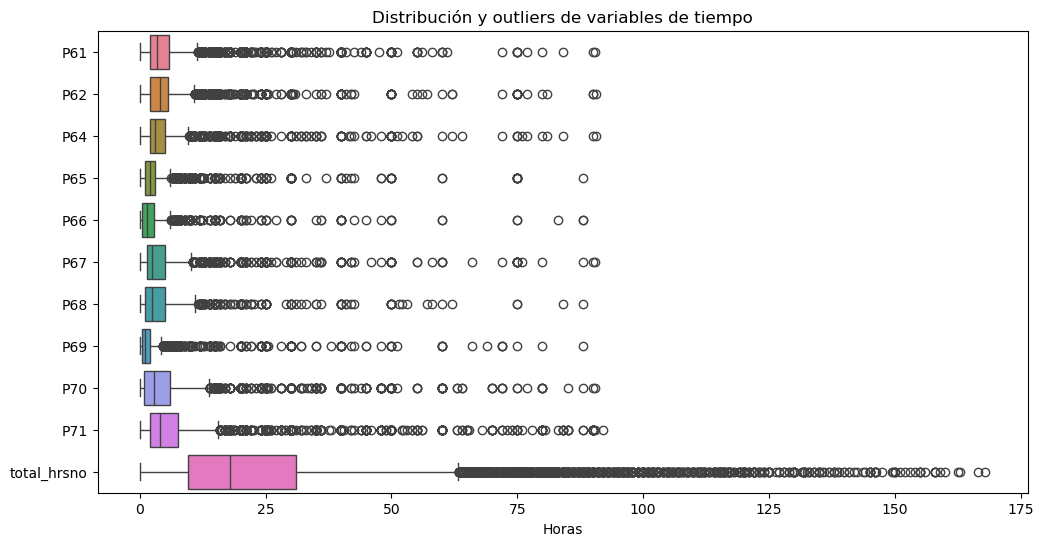

In [74]:
columnas_tiempo = ['P61', 'P62', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'total_hrsno']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_remun[columnas_tiempo], orient='h')  # horizontal
plt.title('Distribución y outliers de variables de tiempo')
plt.xlabel('Horas')
plt.show()

In [106]:
df_remun = df_remun[df_remun['total_hrsno'] != 0]

In [108]:
# Definir los intervalos y etiquetas
bins = [0, 15 , 30 , 45 , 60 ,75, 90, 105, 120, 140, 175 ]
labels = ['0-15', '16-30', '31-45', '46-60' , '61-75' , '76-90', '91-105', '106-120', '121-140', '140+'  ]
# Crear variable categórica
df_remun['rango_noremunerado'] = pd.cut(df_remun['total_hrsno'], bins=bins, labels=labels)


In [110]:
df_remun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23730 entries, 0 to 24270
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   IdUnico             23730 non-null  int64   
 1   Puesto              23730 non-null  object  
 2   SEXO                23726 non-null  category
 3   ID_SEX              23726 non-null  category
 4   GENERO              23726 non-null  category
 5   GRUP_EDAD           23730 non-null  category
 6   P61                 20899 non-null  float64 
 7   P62                 20388 non-null  float64 
 8   P64                 20066 non-null  float64 
 9   P65                 21183 non-null  float64 
 10  P66                 6454 non-null   float64 
 11  P67                 20932 non-null  float64 
 12  P68                 10880 non-null  float64 
 13  P69                 11034 non-null  float64 
 14  P70                 6079 non-null   float64 
 15  P71                 10916 non-null  float

In [114]:
df_remun[df_remun['rango_noremunerado'].isnull()]

,IdUnico,Puesto,SEXO,ID_SEX,GENERO,GRUP_EDAD,P61,P62,P64,P65,P66,P67,P68,P69,P70,P71,total_hrsno,rango_noremunerado
588,1052020,OFICIAL JUDICIAL C,Hombre,Persona heterosexual,Hombre,51+,5.0,9.00,20.00,10.00,45.0,30.00,25.0,15.00,30.0,30.0,NaN,NaN
917,1052836,OFICIAL JUDICIAL C,Hombre,Persona heterosexual,Hombre,41-50,14.0,10.00,9.00,NaN,NaN,24.00,18.0,14.00,24.0,60.0,NaN,NaN
1270,1053611,ANALISTA ESPECIALIZADA/ ESPECIALIZADO,Mujer,Persona heterosexual,Mujer,51+,4.0,14.00,15.00,3.00,NaN,14.00,14.0,7.00,90.0,90.0,NaN,NaN
1342,1053782,OFICIAL ADMINISTRATIVA/ ADMINISTRATIVO,Mujer,Persona heterosexual,Mujer,41-50,24.0,24.00,24.00,24.00,36.0,24.00,24.0,24.00,NaN,NaN,NaN,NaN
1354,1053807,ENFERMERA ESPECIALIZADA/ ENFERMERO ESPECIALIZADO,Mujer,Persona heterosexual,Mujer,51+,40.0,1.50,30.00,20.00,NaN,40.00,30.0,NaN,NaN,50.0,NaN,NaN
2050,1055320,OFICIAL JUDICIAL C,Hombre,Persona heterosexual,Hombre,51+,NaN,NaN,75.00,25.00,NaN,75.00,NaN,25.00,NaN,NaN,NaN,NaN
2744,1056914,SECRETARIA/ SECRETARIO DE JUZGADO,Mujer,Persona heterosexual,Mujer,41-50,72.0,72.00,72.00,12.00,NaN,72.00,15.0,NaN,NaN,NaN,NaN,NaN
3082,1057659,OFICIAL JUDICIAL C,Mujer,Persona heterosexual,Mujer,41-50,30.0,30.00,30.00,30.00,30.0,30.00,30.0,30.00,30.0,30.0,NaN,NaN
3405,1058369,OFICIAL JUDICIAL C,Mujer,Persona heterosexual,Mujer,41-50,8.0,12.00,6.00,6.00,0.0,10.00,7.0,2.50,80.0,80.0,NaN,NaN
3885,1059455,OFICIAL JUDICIAL C,Mujer,Persona heterosexual,Mujer,41-50,NaN,NaN,50.00,30.00,NaN,50.00,50.0,NaN,NaN,30.0,NaN,NaN


In [118]:
print(df_remun.isnull().sum())

IdUnico                   0
Puesto                    0
SEXO                      4
ID_SEX                    4
GENERO                    4
GRUP_EDAD                 0
P61                    2829
P62                    3340
P64                    3664
P65                    2541
P66                   17251
P67                    2796
P68                   12837
P69                   12685
P70                   17633
P71                   12807
total_hrsno               0
rango_noremunerado        0
dtype: int64


In [116]:
#Se eliminan los nulos porque no cumplen con la condición real de 168 hrs a la semana
df_remun = df_remun[df_remun['rango_noremunerado'].notnull()]

In [122]:
tb_no = pd.crosstab(df_remun['rango_noremunerado'], df_remun['SEXO'])
porcentajes = pd.crosstab(df_remun['rango_noremunerado'], df_remun['SEXO'], normalize='index') * 100

# Unir ambas tablas
ren = tb_no.astype(str) + " (" + porcentajes.round(1).astype(str) + "%)"
ren

SEXO,Hombre,Mujer
rango_noremunerado,,
0-15,5800 (59.3%),3989 (40.7%)
16-30,3700 (48.3%),3960 (51.7%)
31-45,1234 (36.1%),2181 (63.9%)
46-60,472 (33.5%),937 (66.5%)
61-75,178 (28.7%),442 (71.3%)
76-90,102 (27.0%),276 (73.0%)
91-105,49 (26.5%),136 (73.5%)
106-120,25 (22.5%),86 (77.5%)
121-140,13 (19.1%),55 (80.9%)


In [124]:
#exportar al escritorio

ruta = '/Users/karlacruz/Desktop/MIDI/BD/'
dataframes = {
    'censo_remuneracion': df_remun,
    'censo_etnico': df_etnico,
    'censo_denuncias': df_denun,
    'censo_maternidad': df_prestmuj,
    'censo_paternidad': df_presthom,
    'censo_estancias': df_hij
    
}

for nombre, df in dataframes.items():
    df.to_csv(f'{ruta}{nombre}.csv', index=False)
